<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Performance Python

In [1]:
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
def perf_comp_data(func_list, data_list, rep=3, number=1):
    ''' Function to compare the performance of different functions.
    
    Parameters
    ==========
    func_list : list
        list with function names as strings
    data_list : list
        list with data set names as strings
    rep : int
        number of repetitions of the whole comparison
    number : int
        number of executions for every function
    '''
    from timeit import repeat
    res_list = {}
    for name in enumerate(func_list):
        stmt = name[1] + '(' + data_list[name[0]] + ')'
        setup = "from __main__ import " + name[1] + ', ' \
                                    + data_list[name[0]]
        results = repeat(stmt=stmt, setup=setup,
                         repeat=rep, number=number)
        res_list[name[1]] = sum(results) / rep
    res_sort = sorted(res_list.items(),
                      key=lambda x: (x[1], x[0]))
    for item in res_sort:
        rel = item[1] / res_sort[0][1]
        print ('function: ' + item[0] +
              ', av. time sec: %9.5f, ' % item[1]
            + 'relative: %6.1f' % rel)

## Python Paradigms and Performance

In [3]:
from math import *
def f(x):
    return abs(cos(x)) ** 0.5 + sin(2 + 3 * x)

In [4]:
I = 500000
a_py = range(I)

In [5]:
def f1(a):
    res = []
    for x in a:
        res.append(f(x))
    return res

In [6]:
def f2(a):
    return [f(x) for x in a]

In [7]:
def f3(a):
    ex = 'abs(cos(x)) ** 0.5 + sin(2 + 3 * x)'
    return [eval(ex) for x in a]

In [8]:
import numpy as np

In [9]:
a_np = np.arange(I)

In [10]:
def f4(a):
    return (np.abs(np.cos(a)) ** 0.5 +
            np.sin(2 + 3 * a))

In [11]:
import numexpr as ne

In [12]:
def f5(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(1)
    return ne.evaluate(ex)

In [13]:
def f6(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(16)
    return ne.evaluate(ex)

In [14]:
%%time
r1 = f1(a_py)
r2 = f2(a_py)
r3 = f3(a_py)
r4 = f4(a_np)
r5 = f5(a_np)
r6 = f6(a_np)

CPU times: user 9.85 s, sys: 170 ms, total: 10 s
Wall time: 10.4 s


In [15]:
np.allclose(r1, r2)

True

In [16]:
np.allclose(r1, r3)

True

In [17]:
np.allclose(r1, r4)

True

In [18]:
np.allclose(r1, r5)

True

In [19]:
np.allclose(r1, r6)

True

In [20]:
func_list = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
data_list = ['a_py', 'a_py', 'a_py', 'a_np', 'a_np', 'a_np']

In [21]:
perf_comp_data(func_list, data_list)

function: f6, av. time sec:   0.00610, relative:    1.0
function: f5, av. time sec:   0.01247, relative:    2.0
function: f4, av. time sec:   0.02382, relative:    3.9
function: f2, av. time sec:   0.37416, relative:   61.4
function: f1, av. time sec:   0.45315, relative:   74.3
function: f3, av. time sec:   9.59223, relative: 1573.6


## Memory Layout and Performance

In [22]:
import numpy as np

In [23]:
np.zeros((3, 3), dtype=np.float64, order='C')

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [24]:
c = np.array([[ 1.,  1.,  1.],
              [ 2.,  2.,  2.],
              [ 3.,  3.,  3.]], order='C')

In [25]:
f = np.array([[ 1.,  1.,  1.],
              [ 2.,  2.,  2.],
              [ 3.,  3.,  3.]], order='F')

In [26]:
x = np.random.standard_normal((3, 150000))
C = np.array(x, order='C')
F = np.array(x, order='F')
x = 0.0

In [27]:
%timeit C.sum(axis=0)

506 µs ± 58.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
%timeit C.sum(axis=1)

268 µs ± 50.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
%timeit C.std(axis=0)

3.16 ms ± 482 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%timeit C.std(axis=1)

1.44 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit F.sum(axis=0)

2.72 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit F.sum(axis=1)

2.98 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%timeit F.std(axis=0)

8.97 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%timeit F.std(axis=1)

8.16 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
C = 0.0; F = 0.0

## Parallel Computing

## Multiprocessing

In [36]:
import multiprocessing as mp

In [37]:
import math
def simulate_geometric_brownian_motion(p):
    M, I = p
      # time steps, paths
    S0 = 100; r = 0.05; sigma = 0.2; T = 1.0
      # model parameters
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                    sigma * math.sqrt(dt) * np.random.standard_normal(I))
    return paths

In [38]:
paths = simulate_geometric_brownian_motion((5, 2))
paths

array([[ 100.        ,  100.        ],
       [ 107.75994389,   96.38974629],
       [ 111.36869054,  104.04967034],
       [  97.36585627,   99.81282855],
       [ 100.33598469,   85.5209064 ],
       [  88.58477948,   76.08336793]])

In [39]:
I = 10000  # number of paths
M = 50  # number of time steps
t = 20  # number of tasks/simulations

In [40]:
# running on server with 4 cores
from time import time
times = []
for w in range(1, 5):
    t0 = time()
    pool = mp.Pool(processes=w)
      # the pool of workers
    result = pool.map(simulate_geometric_brownian_motion, t * [(M, I), ])
      # the mapping of the function to the list of parameter tuples
    times.append(time() - t0)

In [41]:
import matplotlib.pyplot as plt

Text(0.5,1,'20 Monte Carlo simulations')

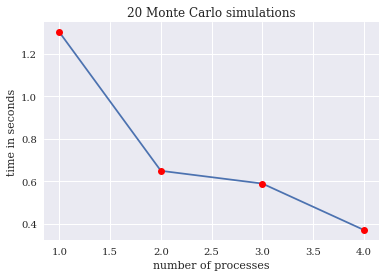

In [42]:
plt.plot(range(1, 5), times)
plt.plot(range(1, 5), times, 'ro')
plt.grid(True)
plt.xlabel('number of processes')
plt.ylabel('time in seconds')
plt.title('%d Monte Carlo simulations' % t)
# tag: multi_proc
# title: Comparison execution speed dependent on the number of threads used (4 core machine)
# size: 60

## Dynamic Compiling

### Introductory Example

In [43]:
from math import cos, log
def f_py(I, J):
    res = 0
    for i in range(I):
        for j in range (J):
            res += int(cos(log(1)))
    return res

In [44]:
I, J = 2500, 2500
%time f_py(I, J)

CPU times: user 2.39 s, sys: 17.2 ms, total: 2.41 s
Wall time: 2.41 s


6250000

In [45]:
def f_np(I, J):
    a = np.ones((I, J), dtype=np.float64)
    return int(np.sum(np.cos(np.log(a)))), a

In [46]:
%time res, a = f_np(I, J)

CPU times: user 117 ms, sys: 67.3 ms, total: 185 ms
Wall time: 183 ms


In [47]:
a.nbytes

50000000

In [48]:
import numba as nb

In [49]:
f_nb = nb.jit(f_py)

In [50]:
%time f_nb(I, J)

CPU times: user 113 ms, sys: 8.23 ms, total: 121 ms
Wall time: 120 ms


6250000

In [51]:
func_list = ['f_py', 'f_np', 'f_nb']
data_list = 3 * ['I, J']

In [52]:
perf_comp_data(func_list, data_list)

function: f_nb, av. time sec:   0.00000, relative:    1.0
function: f_np, av. time sec:   0.13171, relative: 82319.1
function: f_py, av. time sec:   2.20040, relative: 1375253.4


### Binomial Option Pricing

In [53]:
# model & option Parameters
S0 = 100.  # initial index level
T = 1.  # call option maturity
r = 0.05  # constant short rate
vola = 0.20  # constant volatility factor of diffusion

# time parameters
M = 1000  # time steps
dt = T / M  # length of time interval
df = exp(-r * dt)  # discount factor per time interval

# binomial parameters
u = exp(vola * sqrt(dt))  # up-movement
d = 1 / u  # down-movement
q = (exp(r * dt) - d) / (u - d)  # martingale probability

In [54]:
import numpy as np
def binomial_py(strike):
    ''' Binomial option pricing via looping.
    
    Parameters
    ==========
    strike : float
        strike price of the European call option
    '''
    # LOOP 1 - Index Levels
    S = np.zeros((M + 1, M + 1), dtype=np.float64)
      # index level array
    S[0, 0] = S0
    z1 = 0
    for j in range(1, M + 1, 1):
        z1 = z1 + 1
        for i in range(z1 + 1):
            S[i, j] = S[0, 0] * (u ** j) * (d ** (i * 2))
            
    # LOOP 2 - Inner Values
    iv = np.zeros((M + 1, M + 1), dtype=np.float64)
      # inner value array
    z2 = 0
    for j in range(0, M + 1, 1):
        for i in range(z2 + 1):
            iv[i, j] = max(S[i, j] - strike, 0)
        z2 = z2 + 1
        
    # LOOP 3 - Valuation
    pv = np.zeros((M + 1, M + 1), dtype=np.float64)
      # present value array
    pv[:, M] = iv[:, M]  # initialize last time point
    z3 = M + 1
    for j in range(M - 1, -1, -1):
        z3 = z3 - 1
        for i in range(z3):
            pv[i, j] = (q * pv[i, j + 1] +
                        (1 - q) * pv[i + 1, j + 1]) * df
    return pv[0, 0]

In [55]:
%time round(binomial_py(100), 3)

CPU times: user 1.58 s, sys: 30 ms, total: 1.61 s
Wall time: 1.64 s


10.449

In [56]:
def binomial_np(strike):
    ''' Binomial option pricing with NumPy.
    
    Parameters
    ==========
    strike : float
        strike price of the European call option
    '''
    # Index Levels with NumPy
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu * md
    
    # Valuation Loop
    pv = np.maximum(S - strike, 0)

    z = 0
    for t in range(M - 1, -1, -1):  # backwards iteration
        pv[0:M - z, t] = (q * pv[0:M - z, t + 1]
                        + (1 - q) * pv[1:M - z + 1, t + 1]) * df
        z += 1
    return pv[0, 0]

In [57]:
M = 4  # four time steps only
mu = np.arange(M + 1)
mu

array([0, 1, 2, 3, 4])

In [58]:
mu = np.resize(mu, (M + 1, M + 1))
mu

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [59]:
md = np.transpose(mu)
md

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [60]:
mu = u ** (mu - md)
mu.round(3)

array([[ 1.   ,  1.006,  1.013,  1.019,  1.026],
       [ 0.994,  1.   ,  1.006,  1.013,  1.019],
       [ 0.987,  0.994,  1.   ,  1.006,  1.013],
       [ 0.981,  0.987,  0.994,  1.   ,  1.006],
       [ 0.975,  0.981,  0.987,  0.994,  1.   ]])

In [61]:
md = d ** md
md.round(3)

array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ],
       [ 0.994,  0.994,  0.994,  0.994,  0.994],
       [ 0.987,  0.987,  0.987,  0.987,  0.987],
       [ 0.981,  0.981,  0.981,  0.981,  0.981],
       [ 0.975,  0.975,  0.975,  0.975,  0.975]])

In [62]:
S = S0 * mu * md
S.round(3)

array([[ 100.   ,  100.634,  101.273,  101.915,  102.562],
       [  98.743,   99.37 ,  100.   ,  100.634,  101.273],
       [  97.502,   98.121,   98.743,   99.37 ,  100.   ],
       [  96.276,   96.887,   97.502,   98.121,   98.743],
       [  95.066,   95.669,   96.276,   96.887,   97.502]])

In [63]:
M = 1000  # reset number of time steps
%time round(binomial_np(100), 3)

CPU times: user 91.5 ms, sys: 15.2 ms, total: 107 ms
Wall time: 106 ms


10.449

In [64]:
binomial_nb = nb.jit(binomial_py)

In [65]:
%time round(binomial_nb(100), 3)

CPU times: user 746 ms, sys: 32.3 ms, total: 778 ms
Wall time: 784 ms


10.449

In [66]:
func_list = ['binomial_py', 'binomial_np', 'binomial_nb']
K = 100.
data_list = 3 * ['K']

In [67]:
perf_comp_data(func_list, data_list)

function: binomial_np, av. time sec:   0.10355, relative:    1.0
function: binomial_nb, av. time sec:   0.16534, relative:    1.6
function: binomial_py, av. time sec:   1.46389, relative:   14.1


## Static Compiling with Cython

In [68]:
def f_py(I, J):
    res = 0.  # we work on a float object
    for i in range(I):
        for j in range (J * I):
            res += 1
    return res

In [69]:
I, J = 500, 500
%time f_py(I, J)

CPU times: user 7.73 s, sys: 66.2 ms, total: 7.8 s
Wall time: 7.84 s


125000000.0

In [70]:
import pyximport
pyximport.install()

(None, <pyximport.pyximport.PyxImporter at 0x1170e9470>)

In [71]:
import sys
sys.path.append('data/')
  # path to the Cython script
  # not needed if in same directory

In [72]:
from nested_loop import f_cy

In [73]:
%time res = f_cy(I, J)

CPU times: user 203 ms, sys: 2.87 ms, total: 206 ms
Wall time: 205 ms


In [74]:
res

125000000.0

In [75]:
%load_ext Cython

In [76]:
%%cython
#
# Nested loop example with Cython
#
def f_cy(int I, int J):
    cdef double res = 0
    # double float much slower than int or long
    for i in range(I):
        for j in range (J * I):
            res += 1
    return res

In [77]:
%time res = f_cy(I, J)

CPU times: user 188 ms, sys: 2.13 ms, total: 190 ms
Wall time: 189 ms


In [78]:
res

125000000.0

In [79]:
import numba as nb

In [80]:
f_nb = nb.jit(f_py)

In [81]:
%time res = f_nb(I, J)

CPU times: user 266 ms, sys: 6.92 ms, total: 272 ms
Wall time: 277 ms


In [82]:
res

125000000.0

In [83]:
func_list = ['f_py', 'f_cy', 'f_nb']
I, J = 500, 500
data_list = 3 * ['I, J']

In [84]:
perf_comp_data(func_list, data_list)

function: f_nb, av. time sec:   0.22109, relative:    1.0
function: f_cy, av. time sec:   0.23009, relative:    1.0
function: f_py, av. time sec:   8.78361, relative:   39.7


## Generation of Random Numbers on GPUs

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>